In [134]:
from datetime import datetime, timedelta
import requests
import json
import pandas as pd
from bs4 import BeautifulSoup
import time

## Alpaca News

In [77]:
API_KEY = 'PKQDRGDJEHUZE3D7ZK75'
SECRET_KEY = 'YcQ7Izyvpc8UPUGbdbwLsVI1lnH4joOM6RfRMmDs'
start_date = "2024-05-01"
end_date = "2024-06-01"

In [179]:
url = "https://data.alpaca.markets/v1beta1/news"

headers = {
    "accept": "application/json",
    "APCA-API-KEY-ID": API_KEY,
    "APCA-API-SECRET-KEY": SECRET_KEY
}

params = {
    "limit": 50,  
    "symbols": "NVDA", 
    "sort":"desc",
    "start": start_date,
    "end": end_date,

}

In [180]:
response = requests.get(url, headers=headers, params=params)

In [181]:
response_json = json.loads(response.text)

In [182]:
data = []
for news_item in response_json['news']:
    item_data = {
        'id': news_item['id'],
        'author': news_item['author'],
        'created_at': news_item['created_at'],
        'updated_at': news_item['updated_at'],
        'headline': news_item['headline'],
        'summary': news_item['summary'],
        'source': news_item['source'],
        'url': news_item['url'],
        'symbols': news_item['symbols'],  
    }
    data.append(item_data)

In [183]:
df = pd.DataFrame(data)

In [185]:
df

,id,author,created_at,updated_at,headline,summary,source,url,symbols
0,38569426,Zaheer Anwari,2024-05-01T22:35:07Z,2024-05-01T22:35:49Z,Nvidia's Roller Coaster Ride Through Early 202...,\n\tNvidia started 2024 with a strong performa...,benzinga,https://www.benzinga.com/trading-ideas/24/05/3...,[NVDA]
1,38563406,Anusuya Lahiri,2024-05-01T19:44:09Z,2024-05-01T19:44:09Z,Super Micro Updates Fiscal Guidance As Nvidia ...,Wedbush analyst maintains Super Micro Computer...,benzinga,https://www.benzinga.com/news/24/05/38563406/s...,"[IDGT, NVDA, SMCI, XMMO]"
2,38563400,Surbhi Jain,2024-05-01T19:43:46Z,2024-05-01T19:43:47Z,"Intel Gains Favor With Redditors Over Nvidia, ...",Intel is attracting attention from Reddit&#39;...,benzinga,https://www.benzinga.com/trading-ideas/long-id...,"[AMD, INTC, NVDA, TSM]"
3,38561494,Shivani Kumaresan,2024-05-01T18:16:13Z,2024-05-01T18:16:14Z,Nvidia Backed AI Start-Up CoreWeave Lands New ...,"CoreWeave, a cloud-computing firm backed by NV...",benzinga,https://www.benzinga.com/markets/equities/24/0...,"[AMZN, MSFT, NVDA, NVDX, USD]"
4,38560566,Benzinga Insights,2024-05-01T17:35:13Z,2024-05-01T17:35:14Z,10 Information Technology Stocks With Whale Al...,,benzinga,https://www.benzinga.com/insights/options/24/0...,"[AAPL, AMD, FSLY, MRVL, MU, NVDA, SMCI, SWKS, ..."
5,38559813,Piero Cingari,2024-05-01T17:07:02Z,2024-05-01T17:07:03Z,"US Stocks Mixed Ahead Of Fed Meeting, Chipmake...",Traders are treading cautiously in Wednesday’s...,benzinga,https://www.benzinga.com/markets/equities/24/0...,"[ALB, ALL, AMD, AMZN, BTCUSD, BZH, CHRW, DIA, ..."
6,38558952,Chris Katje,2024-05-01T16:39:17Z,2024-05-01T16:39:18Z,"AMD Falls On Q1 Earnings, Q2 Guidance: Why '1,...","AMD raised its guidance for AI segment growth,...",benzinga,https://www.benzinga.com/analyst-ratings/analy...,"[AMD, NVDA]"
7,38556060,Anusuya Lahiri,2024-05-01T15:21:22Z,2024-05-01T15:21:23Z,"After Nvidia and Apple, Alibaba Chases Vietnam...",Alibaba to build data center in Vietnam to com...,benzinga,https://www.benzinga.com/government/24/05/3855...,"[AAPL, AMZN, BABA, CGRO, GOOG, GOOGL, LRCX, NV..."
8,38554907,The Arora Report,2024-05-01T14:57:45Z,2024-05-01T14:59:19Z,"Super Micro Folly, Stock Market Direction Depe...","To gain an edge, this is what you need to know...",benzinga,https://www.benzinga.com/markets/24/05/3855490...,"[AAPL, ADP, AMZN, BTCUSD, GLD, GOOG, META, MSF..."
9,38553582,RIPS,2024-05-01T14:23:03Z,2024-05-01T14:23:34Z,"Market Clubhouse Morning Memo - May 1st, 2024 ...",Good Morning Traders! In today&#39;s Market Cl...,benzinga,https://www.benzinga.com/markets/24/05/3855358...,"[AAPL, GOOGL, META, MSFT, NVDA, QQQ, SPY, TSLA]"


In [99]:
url = df['url'][0]

## Benzinga

In [96]:
BENZINGA_KEY = '800a59c239e94891ab15ed20201c443c'

In [100]:
import requests

# url = "https://api.benzinga.com/api/v1/analyst/insights"

params = {
    "token":"BENZINGA_KEY"
}

In [ ]:
response = requests.request("GET", url, params=params)

In [112]:
response_string = response.content

b'<!DOCTYPE html><html lang="en"><head><meta charSet="utf-8"/><meta name="viewport" content="width=device-width"/><title>10 Information Technology Stocks With Whale Alerts In Today&#x27;s Session - Apple (NASDAQ:AAPL), ARM Holdings (NASDAQ:ARM) - Benzinga</title><script type="application/ld+json">{ "@context": "http://schema.org", "@type": "NewsArticle", "publisher": {"@type":"Organization","logo":{"@type":"ImageObject","url":"/next-assets/images/schema-publisher-logo-benzinga.png"},"name":"Benzinga","url":"https://www.benzinga.com"}, "mainEntityOfPage": { "@type": "WebPage", "@id": "https://www.benzinga.com/insights/options/24/08/40320300/10-information-technology-stocks-with-whale-alerts-in-todays-session" }, "mainEntity": "WebPage", "headline": "10 Information Technology Stocks With Whale Alerts In Today\'s Session - Apple (NASDAQ:AAPL), ARM Holdings", "url": "https://www.benzinga.com/insights/options/24/08/40320300/10-information-technology-stocks-with-whale-alerts-in-todays-sessio
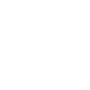

In [113]:
response_string

In [117]:
# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')

In [118]:
title = soup.title.string

In [119]:
title

"10 Information Technology Stocks With Whale Alerts In Today's Session - Apple (NASDAQ:AAPL), ARM Holdings (NASDAQ:ARM) - Benzinga"

In [120]:
paragraphs = soup.find_all('p')

In [122]:
content=''
for p in paragraphs:
    content += p.get_text()
    content += '\n '

In [158]:
stock = 'NVDA'

In [165]:
# Create a prompt template
summary_template = """
You are an AI assistant specialized in investment advisory. 
Summarize the news article with respect to only the specificied stock and interpret the investment sentiment:

Stock: {stock}

Title: {title}

Content: {content}

Summary:"""

In [166]:
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain
from langchain_community.llms import Ollama

In [167]:
summary_prompt = PromptTemplate(template=summary_template, input_variables=["stock", "title", "content"])

In [168]:
llm = Ollama(
    model="llama3"
)

In [169]:
# Create the chain
chain = LLMChain(llm=llm, prompt=summary_prompt)

In [170]:
start = time.time()
response2 = chain.run(stock = stock, title=title, content=content)
end = time.time()

In [171]:
end-start

22.280228853225708

In [172]:
response2

"According to the article, there were 10 Information Technology (IT) stocks that had notable options activity in today's session, including NVDA. Specifically:\n\n* For NVDA, a call option sweep was observed with neutral sentiment, expiring in 4 days on August 16, 2024. This event involved 177 contracts at a $110.00 strike, with a total cost received by the writing party of $53.4K.\n\nSummary: The options activity for NVDA indicates that there may be some neutral sentiment among traders regarding this stock, as evidenced by the call option sweep expiring in August."

In [ ]:
response = requests.request("GET", url, params=querystring)

In [82]:
response_json = json.loads(response.text)

In [83]:
response_json

{'analyst-insights': [{'action': 'Maintains',
   'analyst_insights': "This morning, Tigress Financial maintained their Buy rating on T-Mobile US's stock with a price target of $235.00.  \n\n Tigress Financial maintained a Buy rating on T-Mobile US's stock with a price target of $235.00 due to:\n\n- **Strong Financial and Operational Performance**: T-Mobile US continues to outpace the industry with its customer and services revenue growth, driven by its industry-leading ultra-capacity 5G high-speed network. This technological edge has enabled T-Mobile to achieve significant customer gains, thereby driving revenue and cash flow growth and creating greater shareholder value. The company's Q2 2024 revenue and postpaid service revenues show healthy year-over-year increases, alongside record postpaid phone net customer additions.\n\n- **Strategic Acquisitions and Network Expansion**: T-Mobile's strategic acquisitions and partnerships, such as the purchase of Ryan Reynolds’ Mint Mobile, the p

In [74]:
df = pd.DataFrame(data)

In [75]:
df

,id,author,created_at,updated_at,headline,summary,source,url,symbols
0,40320300,Benzinga Insights,2024-08-12T17:35:12Z,2024-08-12T17:35:12Z,10 Information Technology Stocks With Whale Al...,,benzinga,https://www.benzinga.com/insights/options/24/0...,"[AAPL, ARM, AVGO, DELL, MRVL, MSFT, NVDA, SMCI..."
1,40319443,Piero Cingari,2024-08-12T17:00:48Z,2024-08-12T17:00:49Z,US Stocks Trim Gains As Iran Mulls Attack On I...,Wall Street turns negative due to geopolitical...,benzinga,https://www.benzinga.com/markets/equities/24/0...,"[ALC, BLDP, DIA, GOLD, IWM, KEY, MNDY, NVDA, Q..."
2,40319192,Anusuya Lahiri,2024-08-12T16:43:43Z,2024-08-12T16:56:14Z,What's Going On With Nvidia Stock On Monday?,Nvidia (NVDA) stock rises as analyst notes 152...,benzinga,https://www.benzinga.com/news/24/08/40319192/w...,"[NVDA, SCHG, SMH]"
3,40319116,Benzinga Newsdesk,2024-08-12T16:40:19Z,2024-08-12T16:40:20Z,"On CNBC, Bill Baruch Announces Bought More Nvidia",,benzinga,https://www.benzinga.com/news/24/08/40319116/o...,[NVDA]
4,40315032,The Arora Report,2024-08-12T14:27:11Z,2024-08-12T14:27:13Z,Pay Attention To Change In Stock Market Reacti...,"To gain an edge, this is what you need to know...",benzinga,https://www.benzinga.com/economics/24/08/40315...,"[AAPL, AMZN, BTCUSD, GLD, GOOG, HD, META, MSFT..."
5,40314878,Benzinga Newsdesk,2024-08-12T14:16:38Z,2024-08-12T14:16:52Z,Benzinga Market Summary: Oil Rises On Middle E...,,benzinga,https://www.benzinga.com/economics/macro-econo...,"[NOA, NVDA, SBUX, USO]"
6,40313090,Benzinga Newsdesk,2024-08-12T13:17:42Z,2024-08-12T13:17:42Z,Top 10 Trending Stocks On WallStreetBets As Of...,,benzinga,https://www.benzinga.com/trading-ideas/24/08/4...,"[AI, ASTS, DJT, GLD, INTC, LOT, MADE, NVDA, QQ..."
7,40312593,Benzinga Neuro,2024-08-12T13:03:42Z,2024-08-12T13:03:43Z,'I Just Don't See A Tech Bubble:' CIO Assures ...,"Despite the market&#39;s recovery, many concur...",benzinga,https://www.benzinga.com/analyst-ratings/analy...,"[AAPL, AMZN, GOOGL, META, MSFT, NVDA, TSLA]"
8,40312554,Benzinga Newsdesk,2024-08-12T13:02:20Z,2024-08-12T13:02:21Z,'Nvidia AI Chip Smuggling to China Becomes an ...,,benzinga,https://www.benzinga.com/news/24/08/40312554/n...,"[FXI, NVDA]"
9,40304983,Benzinga Neuro,2024-08-12T01:46:12Z,2024-08-12T01:46:13Z,Nvidia's Earnings Set For 'Drop The Mic' Momen...,The upcoming earnings report from NVIDIA Corp....,benzinga,https://www.benzinga.com/markets/equities/24/0...,"[AMZN, GOOGL, META, MSFT, NVDA]"


In [ ]:
from benzingaorg import news_data
api_key = "testkey892834789s9s8abshtuy"
news = news_data.News(api_key)

In [60]:
df['url'].values[2]

'https://www.benzinga.com/news/24/08/40319192/whats-going-on-with-nvidia-stock-on-monday'

In [61]:
# Fetch the HTML content
response = requests.get(url)
html_content = response.content

In [62]:
html_content

b'<html>\r\n<head><title>403 Forbidden</title></head>\r\n<body>\r\n<center><h1>403 Forbidden</h1></center>\r\n<hr><center>nginx</center>\r\n</body>\r\n</html>\r\n'

In [ ]:
?
symbols=NVDA
&start=2023-08-01
&end=2024-08-01
&limit=1000
&sort=desc

In [ ]:
import requests

url = "https://data.alpaca.markets/v1beta1/corporate-actions?symbols=NVDA&start=2023-08-01&end=2024-08-01&limit=1000&sort=asc"

headers = {
    "accept": "application/json",
    "APCA-API-KEY-ID": "PKQDRGDJEHUZE3D7ZK75",
    "APCA-API-SECRET-KEY": "YcQ7Izyvpc8UPUGbdbwLsVI1lnH4joOM6RfRMmDs"
}

response = requests.get(url, headers=headers)

print(response.text)